In [69]:
import os
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [70]:
# KC house data works better than DC house data
location="kc_house_data.csv"
df=pd.read_csv(location)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [71]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [72]:
# looking for missing data
df_missing = pd.read_csv(location)
df_missing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [75]:
#look for duplicates
dupe=df.duplicated()
df.loc[dupe]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [ ]:
# Get rid of outlier prices
meangrade = df['price'].mean()
stdgrade = df['price'].std()
toprange = meangrade + stdgrade * 1.96
botrange = meangrade - stdgrade * 1.96

copydf = df.copy()
copydf = copydf.drop(copydf[copydf['price'] > toprange].index)
copydf = copydf.drop(copydf[copydf['price'] < botrange].index)

copydf.head()

In [ ]:
# Get rid of outlier bedrooms
meangrade = df['bedrooms'].mean()
stdgrade = df['bedrooms'].std()
toprange = meangrade + stdgrade * 1.96
botrange = meangrade - stdgrade * 1.96

copydf = df.copy()
copydf = copydf.drop(copydf[copydf['bedrooms'] > toprange].index)
copydf = copydf.drop(copydf[copydf['bedrooms'] < botrange].index)

copydf.head()

(array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ]),
 <a list of 11 Text xticklabel objects>)

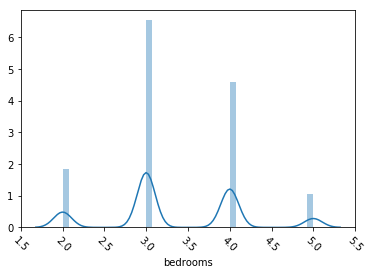

In [101]:
# lets look at number of bedrooms
sns.distplot(copydf['bedrooms'])
plt.xticks(rotation=-45)

(array([ 1880.,  1900.,  1920.,  1940.,  1960.,  1980.,  2000.,  2020.,
         2040.]), <a list of 9 Text xticklabel objects>)

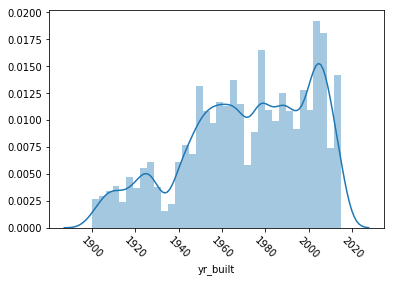

In [105]:
#also want to see year built
sns.distplot(copydf['yr_built'])
plt.xticks(rotation=-45)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.,  8000000.]),
 <a list of 10 Text xticklabel objects>)

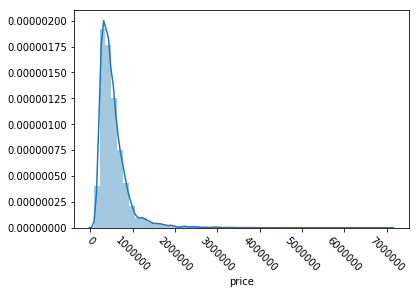

In [102]:
sns.distplot(copydf['price'])
plt.xticks(rotation=-45)

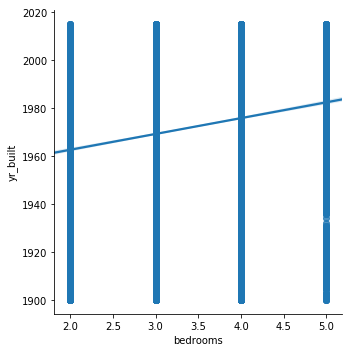

In [107]:
# Trying to see if the number of bedrooms is going up over time
sns.lmplot(x='bedrooms',y='yr_built',data=copydf)

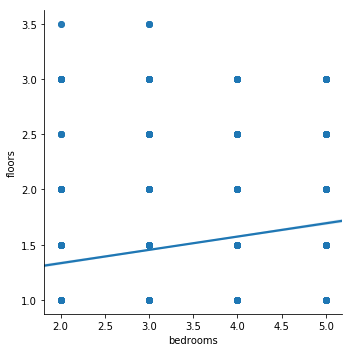

In [119]:
sns.lmplot(x='bedrooms',y='floors',data=copydf)

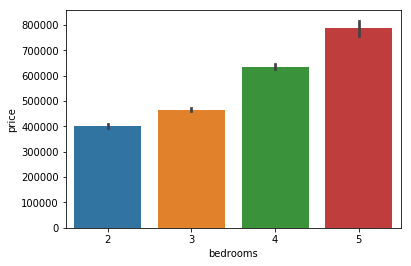

In [121]:
#showing price against bedrooms
sns.barplot(x='bedrooms',y='price',data=copydf)

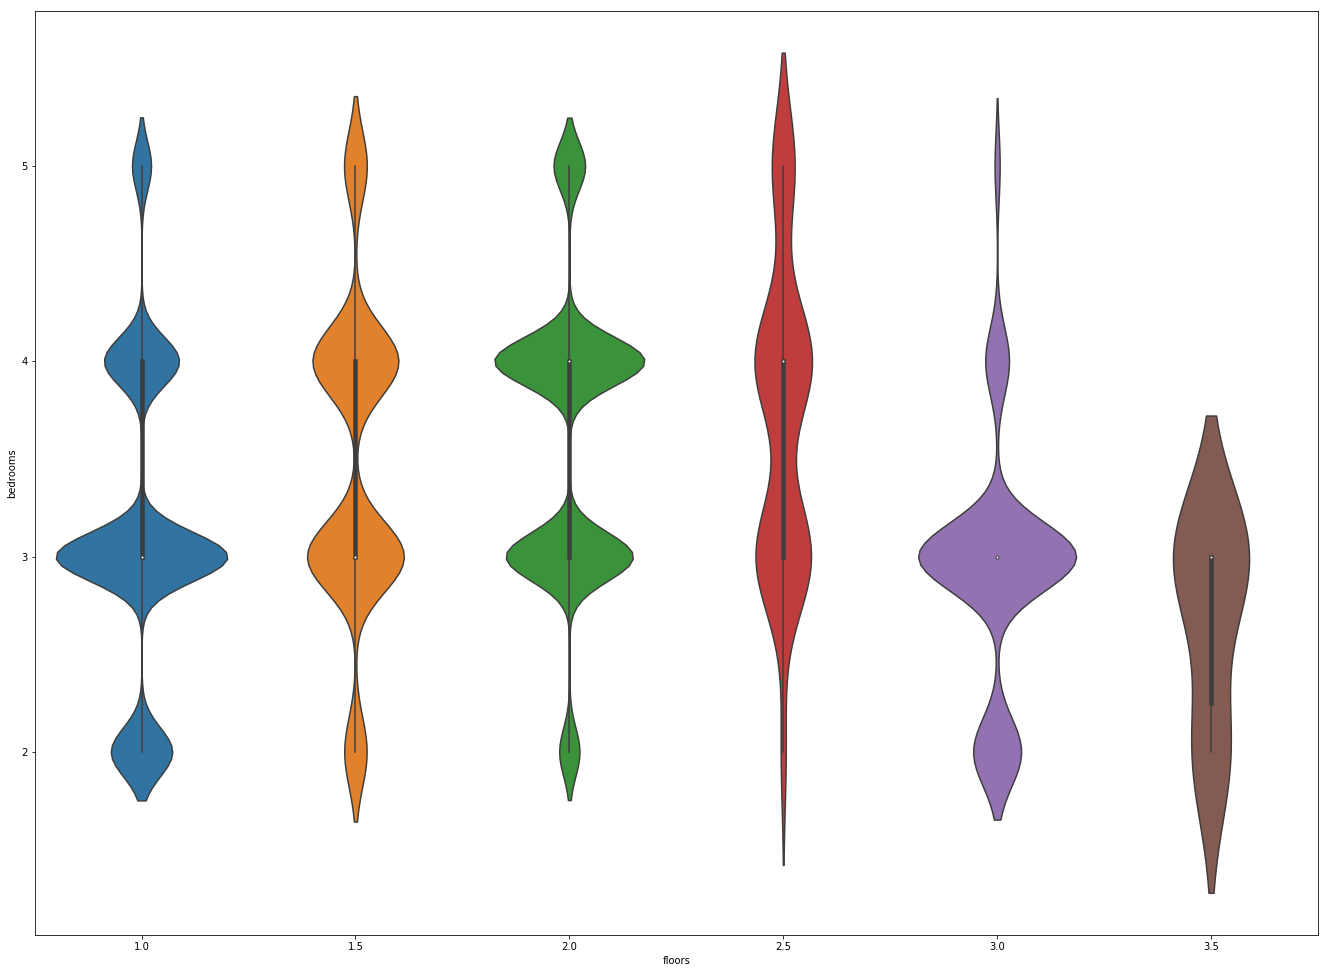

In [97]:
#violin plot of bed rooms vs floors
plt.subplots(figsize=(23,17))
sns.violinplot(x='floors', y='bedrooms', data=copydf)